# Q10 This question involves the use of multiple linear regression on the Auto data set.

### (a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [2]:
from ISLP import load_data
Auto = load_data('Auto')
Auto.columns
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


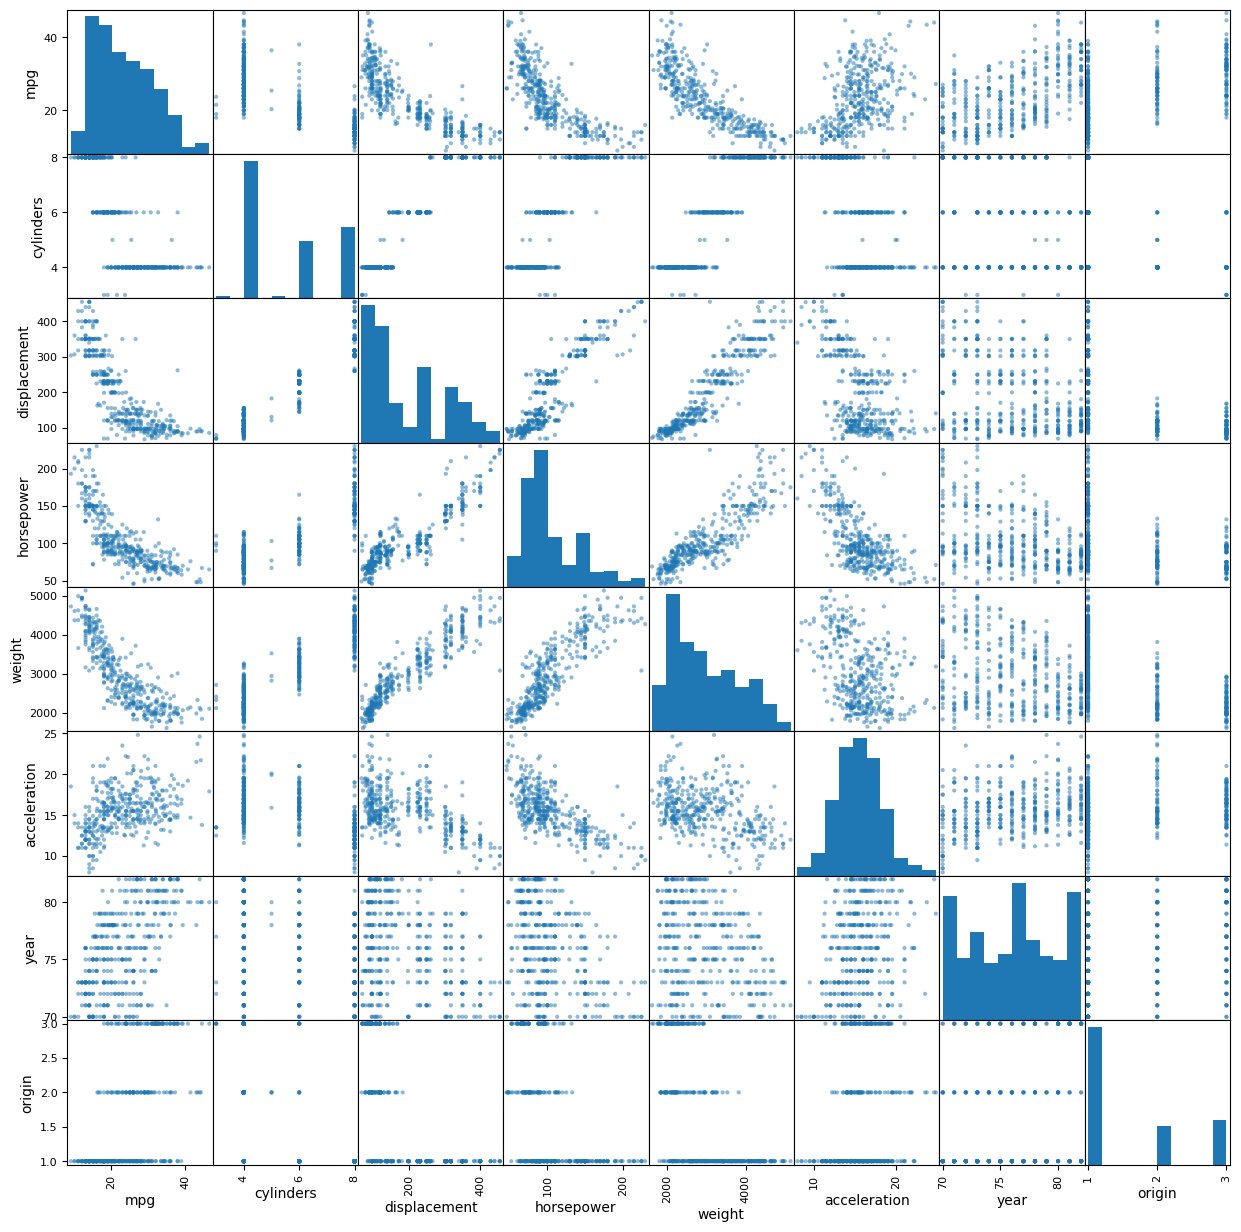

In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

cols = Auto.columns.tolist()

scatter_matrix(Auto[cols], diagonal="hist")
plt.gcf().set_size_inches(15, 15)
plt.show()

### (b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

In [4]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


### (c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output.

##### **Ans:** There are three independent variables whose coefficients with respect to the mpg aren't significant at the level of alpha 0.05. (cylinders, horsepower, and acceleration)

In [6]:
import statsmodels.api as sm
from ISLP.models import ModelSpec, summarize

terms = [col for col in Auto.columns if col not in ["mpg", "name"]]
X = ModelSpec(terms).fit_transform(Auto)
y = Auto["mpg"]
X = sm.add_constant(X)

model1 = sm.OLS(y, X)
results1 = model1.fit()

summarize(results1)


,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


#### (c)i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

##### **Ans:** Yes, there are relationships. For instance, under control of all the other variables, the linear interpretation between mpg and year would be like "On average, an additional year makes mpg increase by 0.7508." 

In [7]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

predictors = [col for col in Auto.columns if col not in ["mpg", "name"]]

formula = "mpg ~ " + " + ".join(predictors)
model1 = ols(formula, data=Auto).fit()
anova_results = anova_lm(model1, typ=2)

anova_results_display = anova_results.copy()
anova_results_display["PR(>F)"] = anova_results["PR(>F)"].apply(lambda x: f"{x:.4f}")

print(anova_results_display)


                   sum_sq     df           F  PR(>F)
cylinders       25.791491    1.0    2.329125  0.1278
displacement    77.612668    1.0    7.008884  0.0084
horsepower      16.739754    1.0    1.511699  0.2196
weight        1091.631693    1.0   98.580813  0.0000
acceleration     7.358417    1.0    0.664509  0.4155
year          2402.249906    1.0  216.937408  0.0000
origin         291.134494    1.0   26.291171  0.0000
Residual      4252.212530  384.0         NaN     nan


#### (c)ii Which predictors appear to have a statistically significant relationship to the response?

##### **Ans:** Except for cylinders, horsepower, and acceleration, all the other independent variables have a statistically significant relationship to the response.

#### (c)iii What does the coefficient for the year variable suggest?

##### **Ans:** The question has been answered in (c)-i.

### (d)Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

##### **Ans:** From the residual plot, we can clearly see that the residuals of the RHS part differ from zero, which may imply the existence of outliers. Furthermore, the Residuals vs Leverage plot helps us identify which outlier it is, specifically the "Buick Estate Wagon (SW)". 

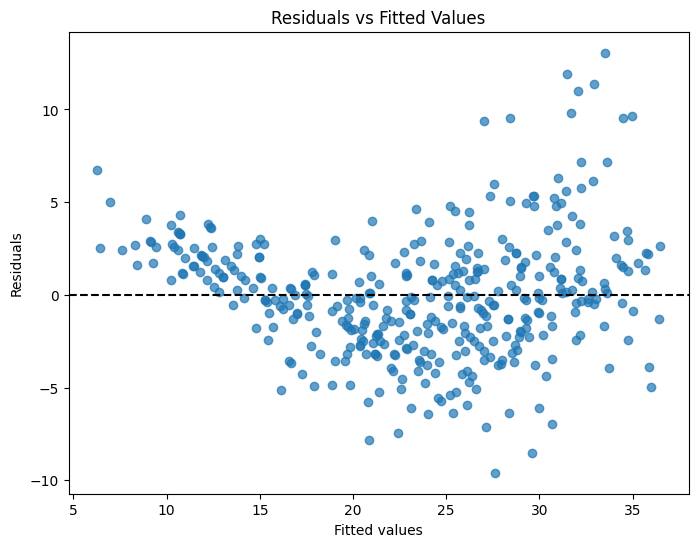

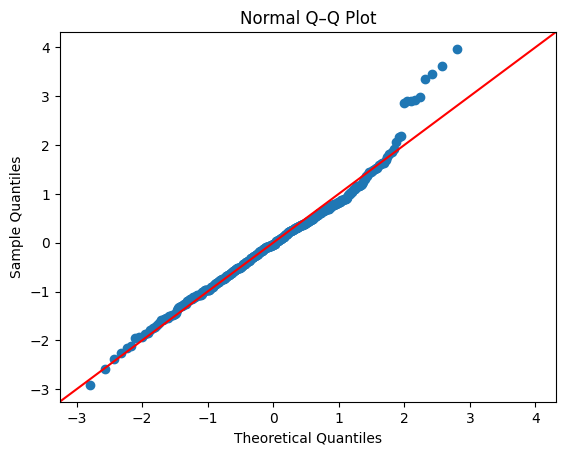

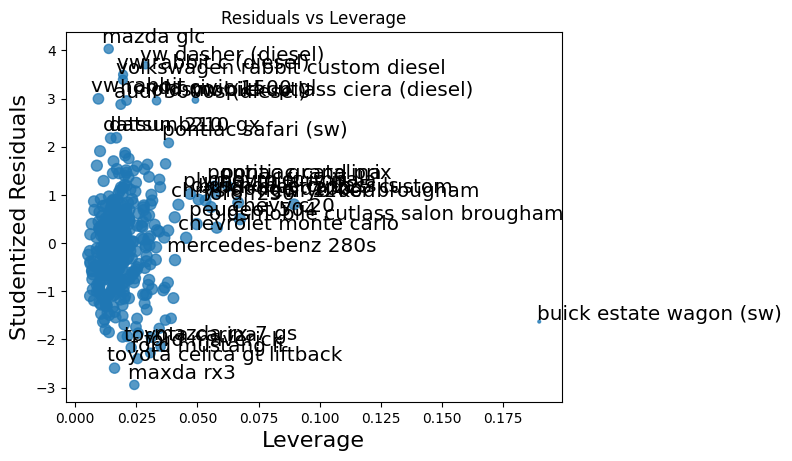

In [13]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 假設你前面已有 results1
# 1. Residuals vs Fitted
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(results1.fittedvalues, results1.resid, alpha=0.7)
ax.axhline(0, color='k', linestyle='--')
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
ax.set_title("Residuals vs Fitted Values")
plt.show()

# 2. Normal Q–Q Plot
sm.qqplot(results1.resid, line='45', fit=True)
plt.title("Normal Q–Q Plot")
plt.show()

# 3. Scale–Location Plot
#fig, ax = plt.subplots(figsize=(8, 6))
#ax.scatter(results1.fittedvalues, abs(results1.resid**0.5), alpha=0.7)
#ax.set_xlabel("Fitted values")
#ax.set_ylabel("√|Standardized Residuals|")
#ax.set_title("Scale–Location Plot")
#plt.show()

# 4. Residuals vs Leverage
sm.graphics.influence_plot(results1, criterion="cooks", size=2)
plt.title("Residuals vs Leverage")
plt.show()


### (e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

##### **Ans:** Yes, the interaction terms between 'horsepower x weight' and 'year x origin' demonstrate statistical significance at the alpha level of 0.05. 

In [31]:
y = Auto["mpg"]

from ISLP.models import ModelSpec as MS
import statsmodels.api as sm
from ISLP.models import summarize

# 建立含交互作用的模型
X = MS([
    'horsepower',
    'weight',
    ('horsepower', 'weight'),  # interaction
    'year',
    ('year', 'origin')         # interaction
]).fit_transform(Auto)

model2 = sm.OLS(y, X)
results2 = model2.fit()
summarize(results2)


,coef,std err,t,P>|t|
intercept,1.924300,3.897000,0.494,0.622
horsepower,-0.215300,0.021000,-10.482,0.000
weight,-0.011000,0.001000,-17.369,0.000
horsepower:weight,0.000055,0.000005,10.833,0.000
year,0.751200,0.045000,16.645,0.000
year:origin,0.009700,0.003000,3.243,0.001


### (f) Try a few different transformations of the variables, such as log(X), √X, X^2. Comment on your findings.

#### ***Ans:*** After taking log and square root transformation, the Skewness performs better compared to the original data, however, the Kurtosis gets worse in the meantime.


=== Transformation Normality Summary ===
              Transformation  Skewness  Kurtosis  |Skew| + |Kurt|
0          Box–Cox (λ=0.191)   -0.0185   -0.8433           0.8618
1      Yeo–Johnson (λ=0.160)   -0.0148   -0.8485           0.8633
2                  Cube root    0.0649   -0.8363           0.9012
3      Log(x+1, negatives→0)   -0.1043   -0.8339           0.9382
4  Square root (negatives→0)    0.1625   -0.8006           0.9631
5                   Original    0.4571   -0.5160           0.9731
6               Square (x^2)    1.0769    0.9248           2.0018


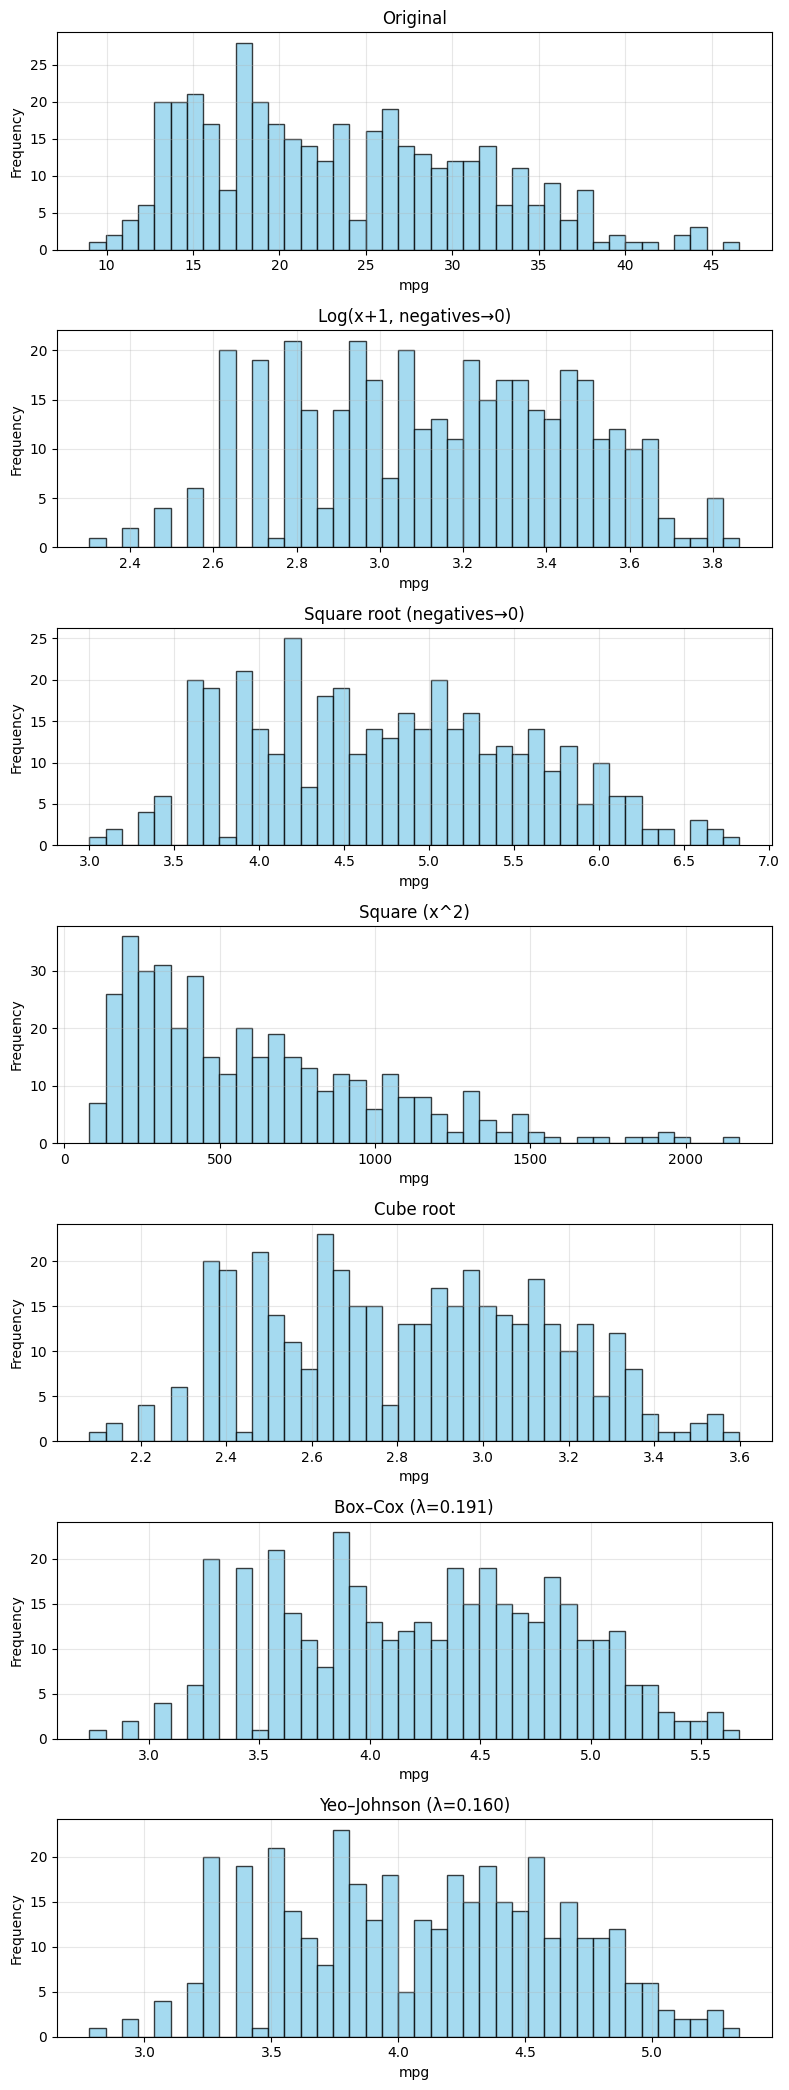

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# === 統一設定要分析的欄位名稱 ===
col = "mpg"  # 修改這裡即可分析其他變數

# === 準備資料（不動原始 Auto） ===
data = Auto[col].copy()

# === 建立結果容器 ===
results = []
transformations = []  # 存放轉換後資料（用來畫圖）

# === (0) 原始資料 ===
orig_skew = stats.skew(data, bias=False, nan_policy='omit')
orig_kurt = stats.kurtosis(data, bias=False, nan_policy='omit')
results.append(['Original', orig_skew, orig_kurt])
transformations.append(('Original', data))

# === (1) Log 轉換（保留原始邏輯）===
log_base = np.where(data < 0, 0, data)
log_trans = np.log(log_base + 1)
results.append([
    'Log(x+1, negatives→0)',
    stats.skew(log_trans, bias=False, nan_policy='omit'),
    stats.kurtosis(log_trans, bias=False, nan_policy='omit')
])
transformations.append(('Log(x+1, negatives→0)', log_trans))

# === (2) 平方根轉換 ===
sqrt_base = np.where(data < 0, 0, data)
sqrt_trans = np.sqrt(sqrt_base)
results.append([
    'Square root (negatives→0)',
    stats.skew(sqrt_trans, bias=False, nan_policy='omit'),
    stats.kurtosis(sqrt_trans, bias=False, nan_policy='omit')
])
transformations.append(('Square root (negatives→0)', sqrt_trans))

# === (3) 平方轉換 ===
square_trans = np.power(data, 2)
results.append([
    'Square (x^2)',
    stats.skew(square_trans, bias=False, nan_policy='omit'),
    stats.kurtosis(square_trans, bias=False, nan_policy='omit')
])
transformations.append(('Square (x^2)', square_trans))

# === (4) 立方根轉換 ===
cube_trans = np.cbrt(data)  # 可處理負值
results.append([
    'Cube root',
    stats.skew(cube_trans, bias=False, nan_policy='omit'),
    stats.kurtosis(cube_trans, bias=False, nan_policy='omit')
])
transformations.append(('Cube root', cube_trans))

# === (5) Box–Cox 轉換（需全為正值） ===
boxcox_base = np.where(data <= 0, np.nan, data)
if np.all(np.isfinite(boxcox_base)) and np.nanmin(boxcox_base) > 0:
    boxcox_trans, lmbda = stats.boxcox(boxcox_base)
    results.append([
        f'Box–Cox (λ={lmbda:.3f})',
        stats.skew(boxcox_trans, bias=False, nan_policy='omit'),
        stats.kurtosis(boxcox_trans, bias=False, nan_policy='omit')
    ])
    transformations.append((f'Box–Cox (λ={lmbda:.3f})', boxcox_trans))
else:
    results.append(['Box–Cox (skip: nonpositive data)', np.nan, np.nan])

# === (6) Yeo–Johnson 轉換（可處理負值） ===
yj_trans, lmbda_yj = stats.yeojohnson(data)
results.append([
    f'Yeo–Johnson (λ={lmbda_yj:.3f})',
    stats.skew(yj_trans, bias=False, nan_policy='omit'),
    stats.kurtosis(yj_trans, bias=False, nan_policy='omit')
])
transformations.append((f'Yeo–Johnson (λ={lmbda_yj:.3f})', yj_trans))

# === 建立結果表格 ===
df_results = pd.DataFrame(results, columns=['Transformation', 'Skewness', 'Kurtosis'])
df_results["|Skew| + |Kurt|"] = abs(df_results["Skewness"]) + abs(df_results["Kurtosis"])
df_results = df_results.sort_values("|Skew| + |Kurt|", ignore_index=True)

print("\n=== Transformation Normality Summary ===")
print(df_results.round(4))

# === (A) 畫出所有直方圖 ===
n = len(transformations)
fig, axes = plt.subplots(nrows=n, ncols=1, figsize=(8, 3*n))
plt.subplots_adjust(hspace=0.4)

for i, (title, series) in enumerate(transformations):
    ax = axes[i]
    series = pd.Series(series).dropna()
    ax.hist(series, bins=40, color='skyblue', edgecolor='black', alpha=0.75)
    ax.set_title(f"{title}", fontsize=12)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()
